In [28]:
# Import and set up
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score

np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns


In [29]:
# Load the dataset
dataset = pd.read_csv('data_train.csv')

X = dataset.drop(['Status', 'Id'], axis=1)
Y = dataset[['Status']]

In [30]:
# Load the testing set
testset = pd.read_csv('data_test.csv')

testX = testset.drop(['Status', 'Id'], axis=1)

In [31]:
# Load the result table
result = pd.read_csv('s3978616_predictions.csv')

In [32]:
# create testing and training data for RM variable
from sklearn.model_selection import train_test_split
trainX, validateX, trainY, validateY = train_test_split(np.array(X), np.array(Y), test_size=0.2)

In [33]:
# Possible values for maximum depth of the tree
max_depths = range(1, 26)  # from 1 to 25
train_performance = list()
valid_performance = list()

for depth in max_depths:
    # Initialize the RandomForestClassifier with specified maximum depth
    clf = RandomForestClassifier(max_depth=depth, random_state=0, class_weight='balanced', n_estimators=50)
    
    clf.fit(trainX, trainY.ravel())  # Train the classifier
    
    train_pred = clf.predict(trainX)
    train_f1 = f1_score(trainY, train_pred, average='macro')  # Calculate the train F1-score
    
    val_pred = clf.predict(validateX)
    val_f1 = f1_score(validateY, val_pred, average='macro')  # Calculate the validation F1-score
    
    train_performance.append(train_f1)
    valid_performance.append(val_f1)




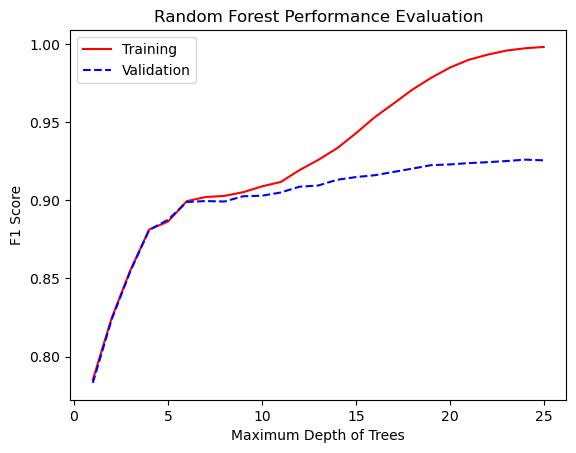

In [34]:
# Plot the f1 scores
# Assuming max_depths from 1 to 25 as used in the tree model
plt.plot(max_depths, train_performance, 'r-')
plt.plot(max_depths, valid_performance, 'b--')

plt.xlabel('Maximum Depth of Trees')
plt.ylabel('F1 Score')
plt.title('Random Forest Performance Evaluation')
plt.legend(['Training', 'Validation'])
plt.show()



In [35]:
# Optionally, you might want to find and print the best depth
best_index = valid_performance.index(max(valid_performance))
best_depth = max_depths[best_index]
print(f"Best validation performance: F1 score = {valid_performance[best_index]} at depth = {best_depth}")

clf = RandomForestClassifier(max_depth=best_depth, random_state=0, class_weight='balanced', n_estimators=50)
    
clf.fit(trainX, trainY.ravel())  # Train the classifier

# Predict the result
test_pred = clf.predict(testX)
result['Status'] = test_pred



Best validation performance: F1 score = 0.9260782000323992 at depth = 24


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [36]:
# Save the file
result.to_csv('s3978616_predictions.csv', index=False)
